In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [54]:
trash_data = pd.read_csv('data/final_trash_data.csv')
trash_data['Tonnage'] = pd.to_numeric(trash_data['Tonnage'].str.replace(',', '.'))
trash_data.set_index('Date', inplace=True)

trash_data['Yard'] = pd.Categorical(trash_data['Yard'])
trash_data['Yard'] = trash_data['Yard'].cat.codes

trash_data['Type'] = pd.Categorical(trash_data['Type'])
trash_data['Type'] = trash_data['Type'].cat.codes

trash_data.drop(columns=['Bundesland'], inplace=True)


trash_data.head()

,Month,CW,Year,Yard,Shift,Tour,Tonnage,Type,Tour_Stays,avg_temperature,...,weekday_Thursday_lag_3,weekday_Friday_lag_1,weekday_Friday_lag_2,weekday_Friday_lag_3,weekday_Saturday_lag_1,weekday_Saturday_lag_2,weekday_Saturday_lag_3,weekday_Sunday_lag_1,weekday_Sunday_lag_2,weekday_Sunday_lag_3
Date,,,,,,,,,,,,,,,,,,,,,
02.01.19,1,1,2019,0,1,1,5.59,0,2159841.0,1.8,...,0,0,0,0,0,0,0,0,0,0
02.01.19,1,1,2019,0,1,4,3.23,0,2159841.0,1.8,...,0,0,0,0,0,0,0,0,0,0
02.01.19,1,1,2019,0,1,5,5.68,0,2159841.0,1.8,...,0,0,0,0,0,0,0,0,0,0
02.01.19,1,1,2019,0,1,6,5.48,0,2159841.0,1.8,...,0,0,0,0,0,0,0,0,0,0
02.01.19,1,1,2019,0,1,7,7.84,0,2159841.0,1.8,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Aufteilen der Daten in Trainings-, Test- und Validierungs-Sets
X = trash_data.drop('Tonnage', axis=1)
y = trash_data['Tonnage']

X.head()
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [60]:
# Training eines linearen Modells
sgd_reg = RandomForestRegressor()
sgd_reg.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
# Evaluierung der Modelle
models = {'SGD': sgd_reg}
for name, model in models.items():
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    print(f'{name} - RMSE: {rmse}, MAE: {mae}, R²: {r2}')

SGD - RMSE: 2.6392520120228435, MAE: 1.7362134492201982, R²: 0.8064905710256588


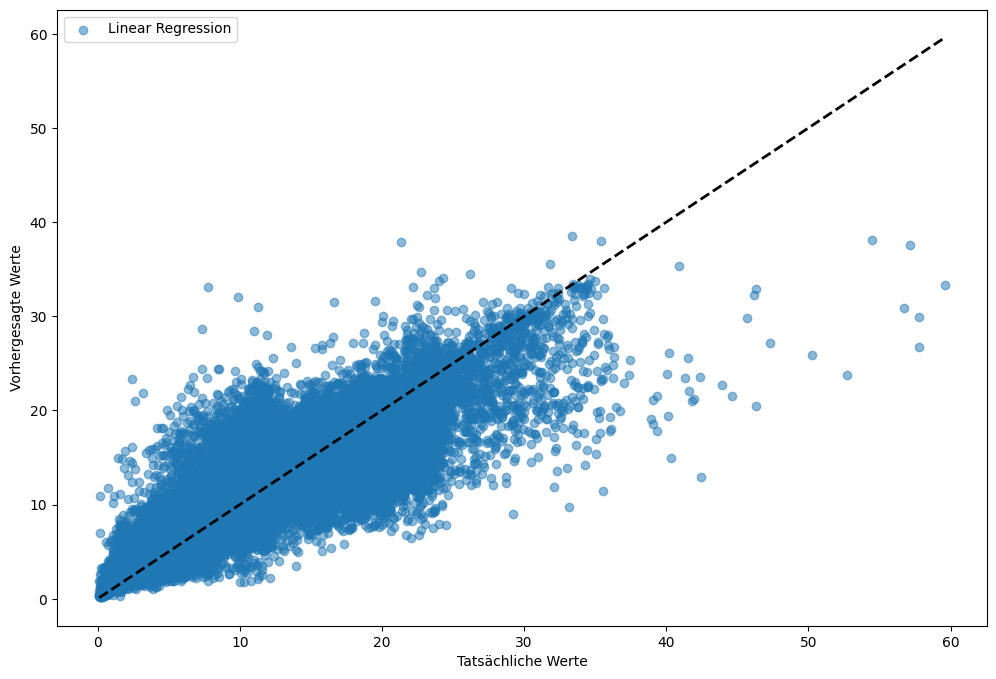

In [62]:
plt.figure(figsize=(12, 8))
plt.scatter(y_val, sgd_reg.predict(X_val), alpha=0.5, label='Linear Regression')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.legend()
plt.show()